<a href="https://colab.research.google.com/github/parmbhullar/California-Housing/blob/master/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_blobs
import regex as re

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
def read_file():
  return pd.read_csv('housing.csv')

In [5]:
df=read_file()

In [6]:
def describe_data():
  print(df.head(),'/n',df.info(),'/n',df.describe())

In [7]:
describe_data()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
   longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0         NEAR BAY
1    -122.22     37.86  ...            358500.0         NEAR BAY
2    -122.24     37.85  ...            352100.0         

In [8]:
df[df['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


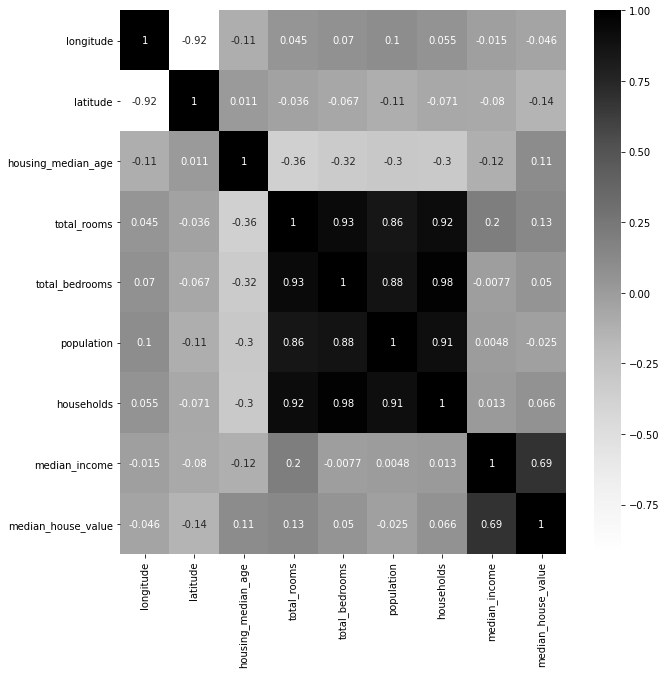

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='Greys',annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b0376f160>,
      dtype=object)

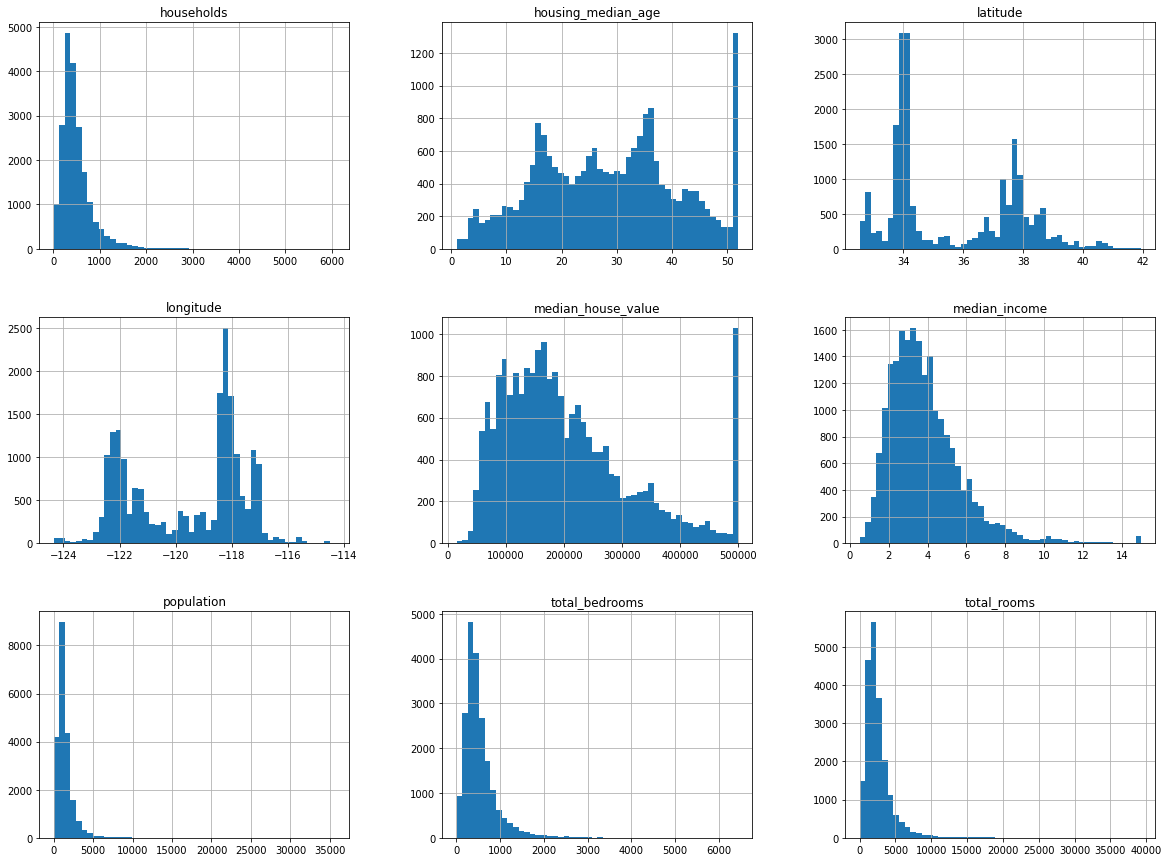

In [10]:
df.hist(figsize=(20,15),bins=50)

In [11]:
df.index=df['longitude']*1000+ df['latitude']
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122192.12,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
-122182.14,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
-122202.15,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
-122212.15,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
-122212.15,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
df['income_cat']=pd.cut(df['median_income'],bins=[0,1.5,3.0,4.5,6,np.inf],labels=[1,2,3,4,5])

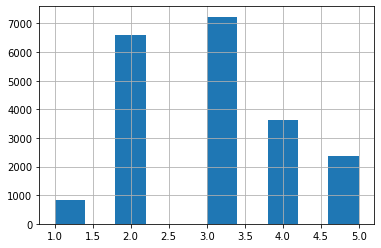

In [13]:
df['income_cat'].hist()

In [14]:
df['income_cat'].value_counts()/len(df['income_cat'])

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [15]:
x=df.drop('median_house_value',axis=1)
y=df['median_house_value']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,train_size=0.5)

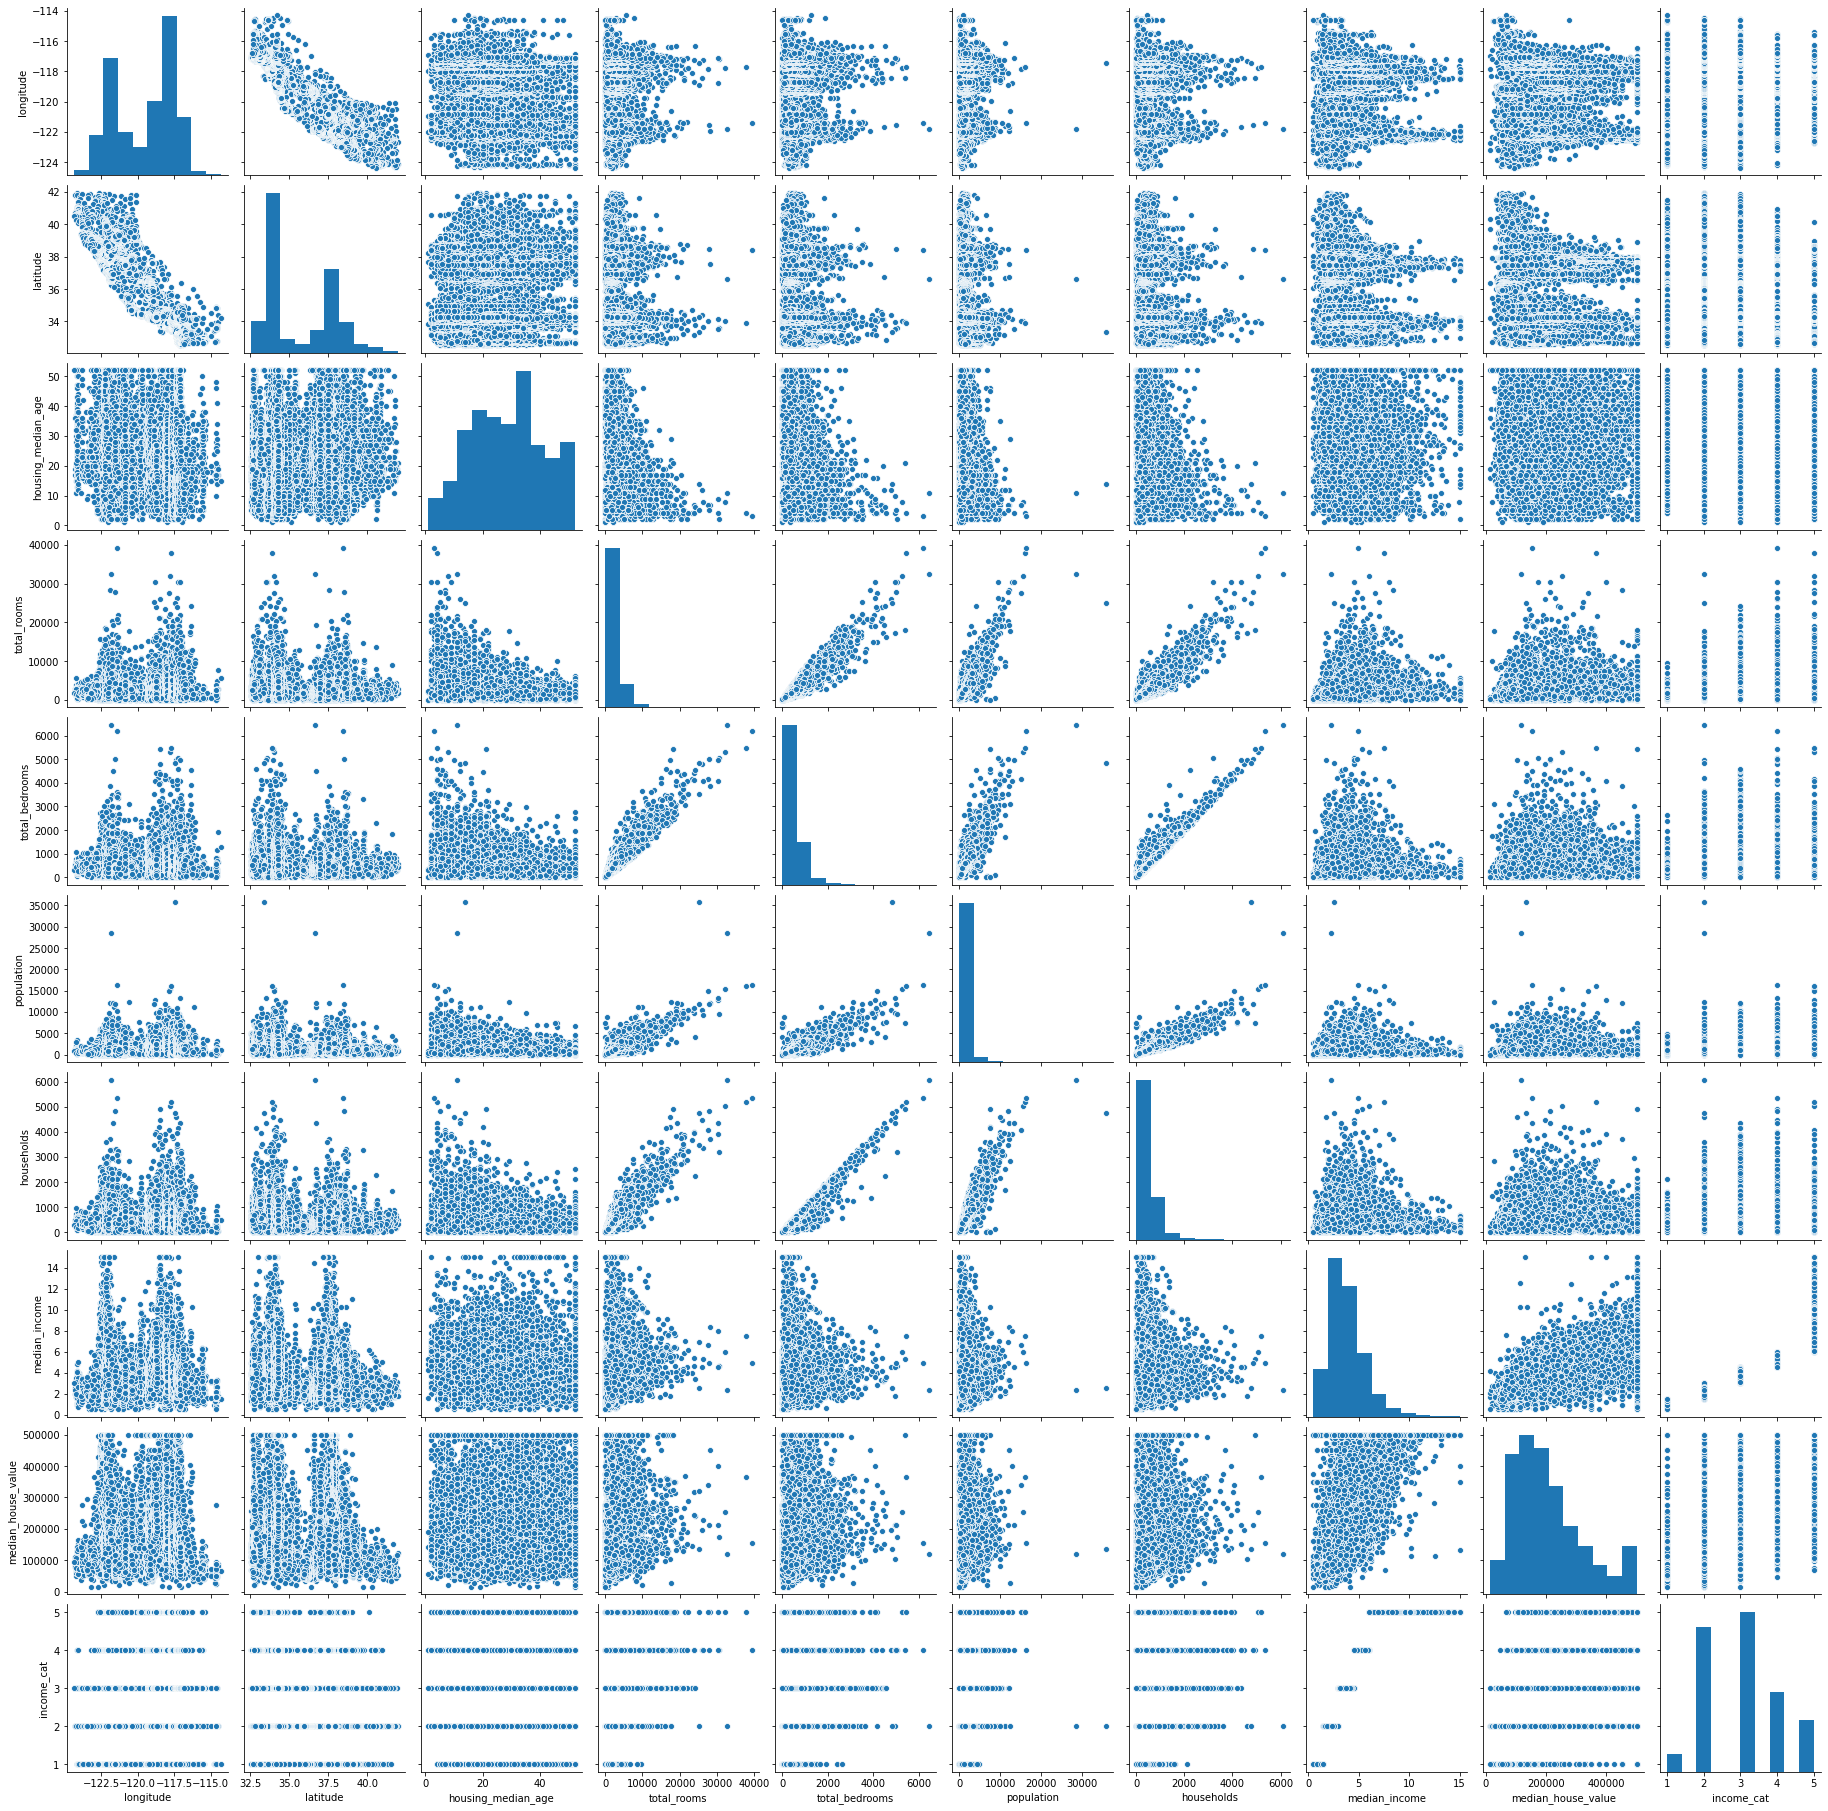

In [17]:
sns.pairplot(df)

In [18]:
df[['total_bedrooms', 'households','total_rooms','population']].corr()

,total_bedrooms,households,total_rooms,population
total_bedrooms,1.000000,0.979728,0.930380,0.877747
households,0.979728,1.000000,0.918484,0.907222
total_rooms,0.930380,0.918484,1.000000,0.857126
population,0.877747,0.907222,0.857126,1.000000


In [19]:
df['bedrooms_per_room']=df['total_bedrooms']/df['total_rooms']

In [20]:
df[['bedrooms_per_room','median_house_value']].corr()

,bedrooms_per_room,median_house_value
bedrooms_per_room,1.00000,-0.25588
median_house_value,-0.25588,1.00000


In [21]:
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_per_room    -0.255880
Name: median_house_value, dtype: float64

In [22]:
df['bedrooms_per_room'].isnull().value_counts()

False    20433
True       207
Name: bedrooms_per_room, dtype: int64

In [23]:
def fill_missing(data):
  
  return data.fillna(data.median(),inplace=True)
fill_missing(df['bedrooms_per_room'])

In [66]:
def encode_concat(data,column):
  from sklearn.preprocessing import OneHotEncoder
  onehot=OneHotEncoder()

  df_cat=onehot.fit_transform(column)

  df_cat1=pd.DataFrame(df_cat.toarray(),columns=['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],index=data.index)
  dataframes=[data,df_cat1]
  df_final=pd.concat(dataframes,axis=1,ignore_index=False)
  df_final.drop('ocean_proximity',axis=1,inplace=True)
  return df_final.head()

In [67]:
encode_concat(df,df[['ocean_proximity']])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
-122192.12,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5,0.146591,0.0,0.0,0.0,1.0,0.0
-122182.14,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5,0.155797,0.0,0.0,0.0,1.0,0.0
-122202.15,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5,0.129516,0.0,0.0,0.0,1.0,0.0
-122212.15,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4,0.184458,0.0,0.0,0.0,1.0,0.0
-122212.15,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,0.172096,0.0,0.0,0.0,1.0,0.0


Feature selection: I think features with less than 0.3 correlation with the target are irrelevant mostly but here I see strong corr in some of the features, so I'll be feeding those to the model

In [73]:
df_final.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_per_room    -0.254632
INLAND               -0.484859
Name: median_house_value, dtype: float64

In [75]:
df_fs=df_final[['latitude', 'housing_median_age', 'total_rooms', 'population', 'median_income',
       'median_house_value', 'income_cat', 'bedrooms_per_room', '<1H OCEAN',
       'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']]

Okay, I dont think standard scaler would be a great fit because there are some outliers in the dataset. Giving it a try though.

In [71]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [79]:
x=df_fs.drop('median_house_value',axis=1)
y=df_fs[['median_house_value']]

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,train_size=0.5)

In [91]:
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)
y_train_sc=sc.fit_transform(y_train)
y_test_sc=sc.fit_transform(y_test)

In [94]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train_sc,y_train_sc)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
pred=lm.predict(x_test_sc)

Evaluating the Linear Model

In [101]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_sc,pred,squared=False)

0.608171819705579

In [129]:
pred=np.sort(pred,axis=0)
y_test_sc=np.sort(y_test_sc,axis=0)
pred_rfr=np.sort(pred_rfr,axis=0)

In [127]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [128]:
rfr.fit(x_train_sc,y_train_sc)
pred_rfr=rfr.predict(x_test_sc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Eval the Forest Model

In [132]:
mean_squared_error(y_test_sc,pred_rfr,squared=False)

0.1780044125521044

Plotting the Model performance

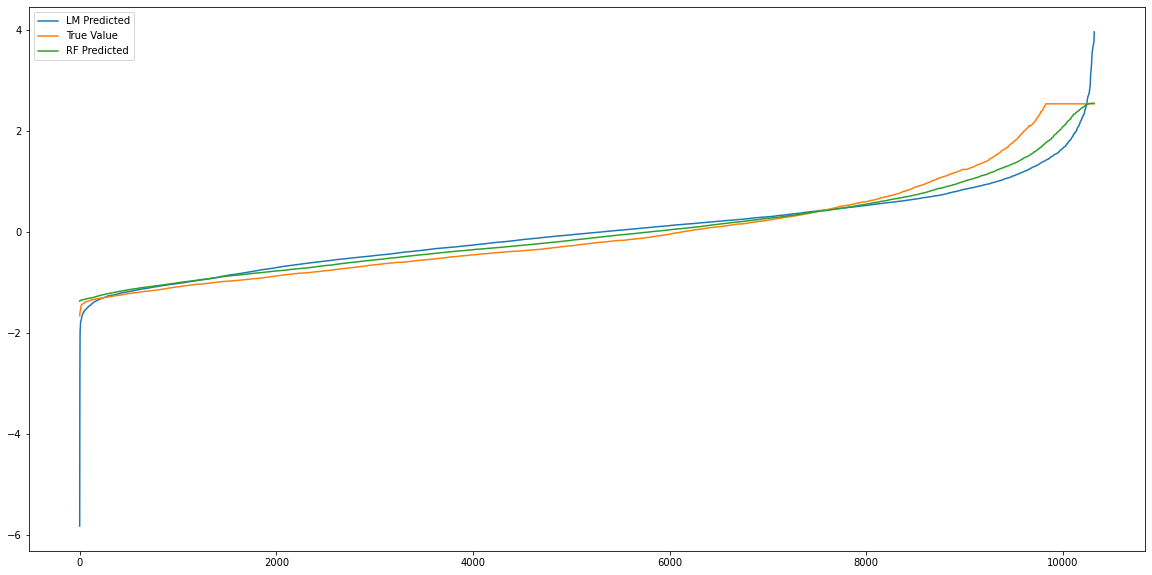

In [135]:
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(pred,label='LM Predicted')
ax.plot(y_test_sc,label='True Value')
ax.plot(pred_rfr, label='RF Predicted')
ax.legend()

Magnifying a bit

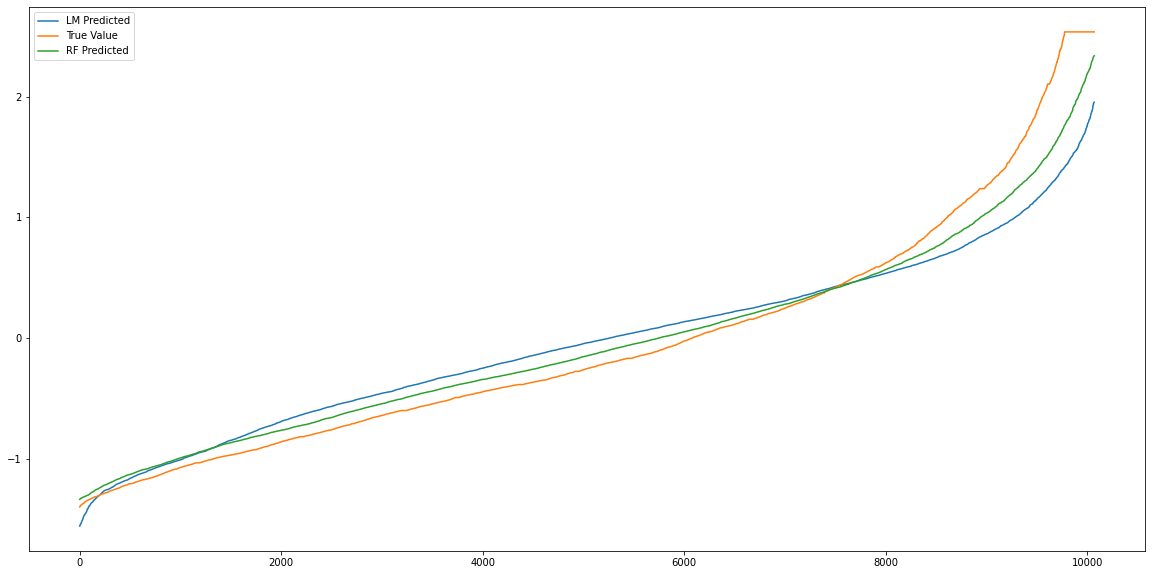

In [138]:
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(pred[50:-200],label='LM Predicted')
ax.plot(y_test_sc[50:-200],label='True Value')
ax.plot(pred_rfr[50:-200], label='RF Predicted')
ax.legend()